### Load Libraries

In [56]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Import Data

In [2]:
df=pd.read_csv('clean-healthcare-dataset-stroke-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4908 non-null   float64
 1   hypertension                    4908 non-null   int64  
 2   heart_disease                   4908 non-null   int64  
 3   avg_glucose_level               4908 non-null   float64
 4   bmi                             4908 non-null   float64
 5   Male                            4908 non-null   int64  
 6   ever_married                    4908 non-null   int64  
 7   Urban                           4908 non-null   int64  
 8   work_type_Govt_job              4908 non-null   int64  
 9   work_type_Never_worked          4908 non-null   int64  
 10  work_type_Private               4908 non-null   int64  
 11  work_type_Self-employed         4908 non-null   int64  
 12  work_type_children              49

In [3]:
mms=MinMaxScaler()
mms_scaled=mms.fit_transform(df)
mms_df=pd.DataFrame(mms_scaled, columns=df.columns)
mms_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,Male,ever_married,Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0.816895,0.0,1.0,0.801265,0.301260,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.975586,0.0,1.0,0.234512,0.254296,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.597168,0.0,0.0,0.536008,0.276060,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.963379,1.0,0.0,0.549349,0.156930,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.987793,0.0,0.0,0.605161,0.214204,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,0.157715,0.0,0.0,0.221402,0.095074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4904,0.987793,0.0,0.0,0.323516,0.340206,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4905,0.426270,0.0,0.0,0.128658,0.232532,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4906,0.621582,0.0,0.0,0.513203,0.175258,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Create Balanced Sample dataset

### Find Best Depth

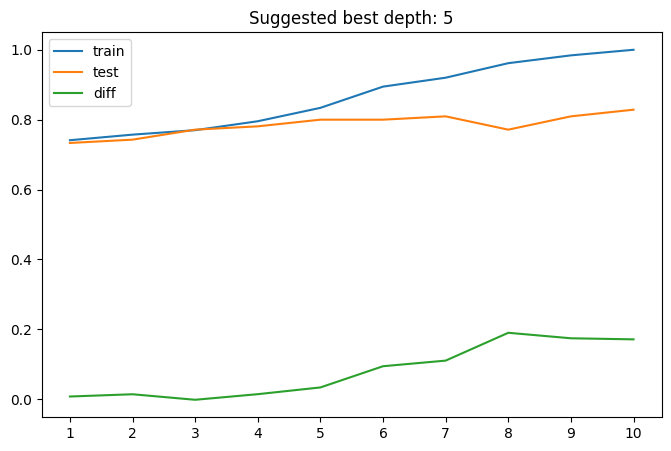

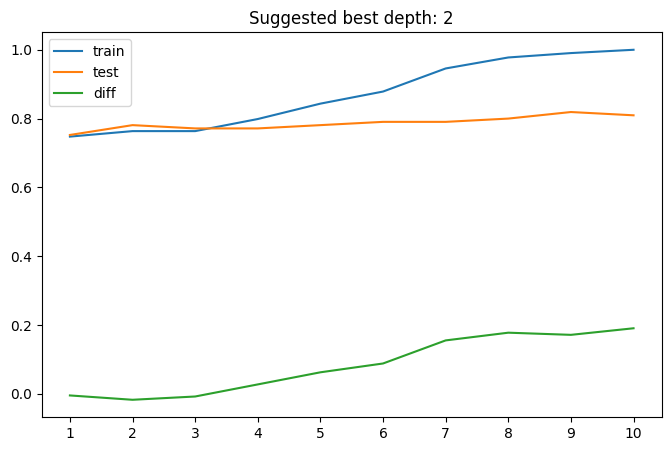

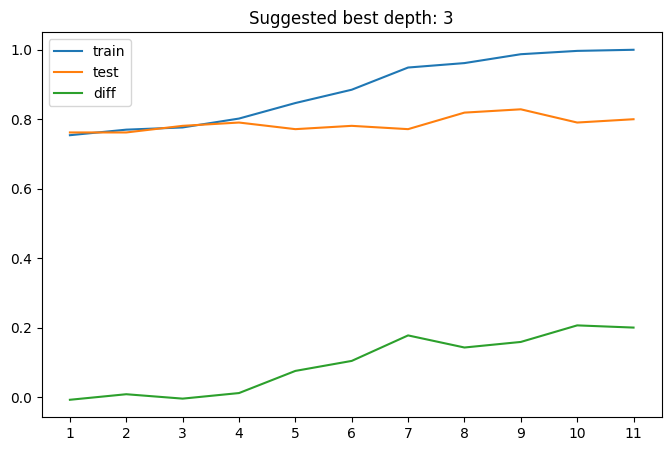

In [90]:
Positives=df.loc[df['stroke']==df['stroke'].max()]
for i in range(1,4):
    Negatives_sample=df.loc[df['stroke']==df['stroke'].min()] \
    .sample(len(Positives)*i,random_state=1, ignore_index=True)
    Balanced_sample=pd.concat([Positives,Negatives_sample],axis=0)
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
    scores = {'train': [], 'test': [], 'diff': [], 'score':[]} 
    score_depth=[]
    train_score=0
    depth=0
    best=0
    hight_score=0
    while train_score<1:
        depth+=1
        clf = RandomForestClassifier(max_depth = depth)
        clf.fit(X_train, y_train)
        train_score = clf.score(X_train,y_train)
        test_score = clf.score(X_test, y_test)
        score=test_score*(1-(train_score-test_score))

        score_depth.append(depth)
        scores['train'].append(train_score)
        scores['test'].append(test_score)
        scores['diff'].append(train_score-test_score)
        scores['score'].append(score)
        
        if hight_score<score:
            hight_score=score
            best=depth

    results=pd.DataFrame(scores, index=score_depth)
    results[['train','test','diff']].plot(xticks=results.index, figsize=(8,5),title=f'Suggested best depth: {best}')
    